This create one spatiotemporal diagram for one incident

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [24]:
# could later set global variables here
minutes = 480  # 20 hours
meters = 7000 # 10 km

minute_steps = 10 
meter_steps = 100

sigma = 200 # standard was 45
tau = 45 # standard was 45

In [25]:
# create datapoints from trajectory for 5 hours
incident_id = "RWS02_0000165492_165492"
x_t_v_data_path = f"/Users/vree/GithubRepos/DataScience/basFiles/fromIncidentToInterpolationData/incidentInterpolationData/{incident_id}.csv"



x    1324.576342
t       0.533333
v      23.750000
dtype: float64
x    7609.961312
t     479.533333
v     147.000000
dtype: float64


/var/folders/c0/2gmfm5qd4tl9nzl882r0xr040000gn/T/ipykernel_44444/4189320659.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datapoints = [(row[0], row[1], row[2]) for index, row in data1.iterrows()]


Contains NaN: False
Contains Inf: False


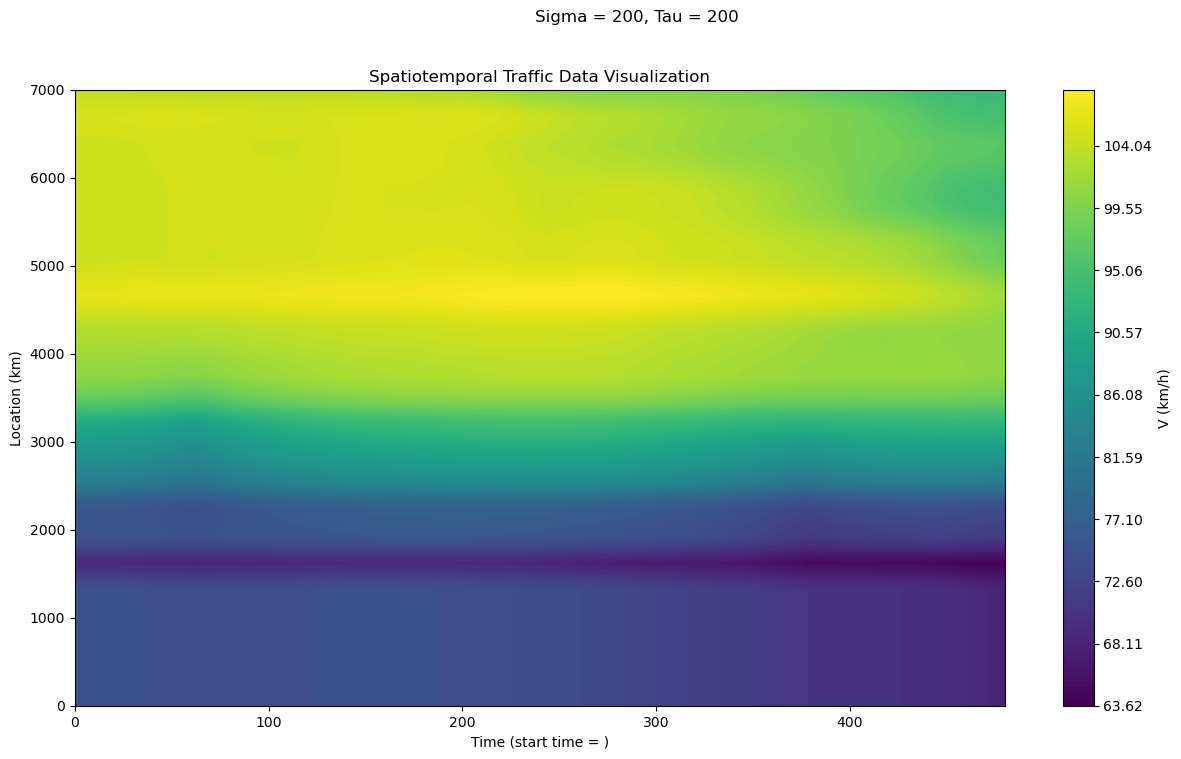

0

In [26]:
def phi_0(x, t, xi, ti, sigma, tau):
    return np.exp(- (np.abs(x - xi) / sigma + np.abs(t - ti) / tau))

def N(x, t, datapoints, sigma, tau):
    return sum(phi_0(x, t, xi, ti, sigma, tau) for xi, ti, _ in datapoints)

def V(x, t, datapoints, sigma, tau):
    normalization_factor = N(x, t, datapoints, sigma, tau)
    return sum(phi_0(x, t, xi, ti, sigma, tau) * vi for xi, ti, vi in datapoints) / normalization_factor

def spatiotemporal(datapoints):
    

    # Create a grid for the spatiotemporal map
    spatio_map = np.zeros((int(minutes / minute_steps), int(meters / meter_steps)))

    for i in range(0, minutes, minute_steps):
        for j in range(0, meters, meter_steps):
            spatio_map[int(i / minute_steps), int(j / meter_steps)] = V(j, i, datapoints, sigma, tau)

    return spatio_map

# Example synthetic data (xi, ti, vi)
# datapoints = [(np.random.randint(0, meters), np.random.randint(0, minutes), np.random.uniform(20, 120)) for _ in range(100)]


data1  =pd.read_csv(x_t_v_data_path)

# print minimum of values of the data for each column
print(data1.min())
print(data1.max())

datapoints = [(row[0], row[1], row[2]) for index, row in data1.iterrows()]

# Generate the spatiotemporal map
spatio_map = spatiotemporal(datapoints)

print("Contains NaN:", np.isnan(spatio_map).any())
print("Contains Inf:", np.isinf(spatio_map).any())

# Define the axes
y = np.linspace(0, meters, spatio_map.shape[1])  # Location axis for the y-axis
x = np.linspace(0, minutes, spatio_map.shape[0])  # Time axis for the x-axis

# Create the meshgrid for plotting, now with time on the x-axis and location on the y-axis
T, Y = np.meshgrid(x, y)

# Visualize the spatiotemporal map with location on the y-axis and time on the x-axis
plt.figure(figsize=(15, 8))
cp = plt.contourf(T, Y, spatio_map.T, levels=np.linspace(spatio_map.min(), spatio_map.max(), 100), cmap='viridis')
plt.colorbar(cp, label='V (km/h)')



# Set the labels correctly
plt.xlabel('Time (start time = )')
plt.ylabel('Location (km)')
plt.title('Spatiotemporal Traffic Data Visualization')
# set in the subtitle the settings for sigma and tau
plt.suptitle('Sigma = 200, Tau = 200')
# safe figure to ./spatiodiagrams folder, with random name
random = np.random.randint(0, 100000)
plt.savefig('./fromIncidentToInterpolationData/diagramsForModelTraining/' + incident_id + '.png')

plt.show()

os.system('say "full spatio finished"')




Creating maps without interpolation below

In [27]:

# # show map without extrapolating the data, just the traces of the cameras

# def spatiotemporal_unique(datapoints):
#     # Create a grid for the spatiotemporal map
#     spatio_map = np.zeros((int(minutes / minute_steps)+2, int(meters / meter_steps)+2))
    
#     # per location the datapoints are added chronologically, therefore we can use here the minutesteps as well
#     for i in range(0, len(datapoints), minute_steps):
#         spatio_x_axis = int(datapoints[i][1]/minute_steps)
#         spatio_y_axis = int(datapoints[i][0]/meter_steps)
#         print("spatio x axis: ", spatio_x_axis, "for i = ", i)
#         print("spatio y axis: ", spatio_y_axis, "for i = ", i)
#         spatio_map[spatio_x_axis, spatio_y_axis] = V(datapoints[i][0], datapoints[i][1], datapoints, sigma, tau)
        
#     return spatio_map


# # Example synthetic data (xi, ti, vi)
# # datapoints = [(np.random.randint(0, meters), np.random.randint(0, minutes), np.random.uniform(20, 120)) for _ in range(100)]

# # Load the data
# data = pd.read_csv(x_t_v_data_path)
# datapoints = [(row[0], row[1], row[2]) for index, row in data.iterrows()]

# # Generate the spatiotemporal map
# spatio_map = spatiotemporal_unique(datapoints)

# # Define the axes
# y = np.linspace(0, meters, spatio_map.shape[1])  # Location axis for the y-axis
# x = np.linspace(0, minutes, spatio_map.shape[0])  # Time axis for the x-axis

# # Create the meshgrid for plotting, now with time on the x-axis and location on the y-axis
# T, Y = np.meshgrid(x, y)

# # Visualize the spatiotemporal map with location on the y-axis and time on the x-axis
# plt.figure(figsize=(15, 8))
# cp = plt.contourf(T, Y, spatio_map.T, levels=np.linspace(spatio_map.min(), spatio_map.max(), 100), cmap='viridis')
# plt.colorbar(cp, label='V (km/h)')

# # Set the labels correctly
# plt.xlabel('Time (minutes from 7 AM)')
# plt.ylabel('Location (km)')
# plt.title('Spatiotemporal Traffic Data Visualization')

# #save figure to ./spatiodiagrams_traces folder, with random name
# plt.savefig('./spatiodiagrams_traces/spatiotemporal' + str(random) + '.png')

# plt.show()      

# os.system('say "your program has finished"')
        
        


In [28]:
# import os
# # For macOS
# os.system('say "your program has finished"')


